### Import packages

In [1]:

from matplotlib import pyplot as plt
import numpy as np
# More information about skimage draw module can be found at
# https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.line
from skimage.draw import line, line_aa
from skimage.draw import circle_perimeter, circle_perimeter_aa


---
###  Image negative 
---

In [2]:
def my_image_negative(input_image):
    """Description:
    This function converts the input image into image negative.
    The implementation is that output intensity = 255 - input intensity, where 255 is the maximum intensity of an 8-bit single channel image.
    Then, output intensity is stored at the same pixel position.

    Parameter: input_image = input image array.

    Return: new_image = image negative.

    Requirements:
    Pre-defined/built-in functions for image negative cannot be used.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

     """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    for i in range(H):
      for j in range(W):
        # Compute the negative intensity by subtracting the input intensity from 255
        negative_intensity = 255 - input_image[i, j]
        # Store the negative intensity at the same pixel position in the new image
        new_image[i, j] = negative_intensity

    return new_image


---
### Image smoothing 
---

In [3]:
def my_image_smoothing(input_image):
    """Description:
    This function smooths the input image by using a 3x3 mean filter.
    The implementation of the 3x3 mean filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    for i in range(1, H - 1):
        for j in range(1, W - 1):
            # Compute the average intensity of the 3x3 neighborhood
            average_intensity = (input_image[i-1, j-1] + input_image[i-1, j] + input_image[i-1, j+1] +
                                 input_image[i, j-1] + input_image[i, j] + input_image[i, j+1] +
                                 input_image[i+1, j-1] + input_image[i+1, j] + input_image[i+1, j+1]) / 9.0
            # Store the average intensity in the corresponding position of the new image
            new_image[i, j] = average_intensity

    return new_image

---
### Edge gradient magnitude estimation 
---

In [4]:
def my_grad_mag(input_image):
    """Description:
    This function estimates the edge gradient magnitude from the input image by using
    the 3x3 Sobel operators along x and y directions.
    The implementation of the 3x3 Sobel operators follows the details given in the Image Derivatives and Edge Detection lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation, edge detection cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    for i in range(1, H - 1):
        for j in range(1, W - 1):
            # Apply the Sobel operators along x and y directions
            gradient_x = (input_image[i-1, j+1] + 2 * input_image[i, j+1] + input_image[i+1, j+1]) - \
                         (input_image[i-1, j-1] + 2 * input_image[i, j-1] + input_image[i+1, j-1])
            gradient_y = (input_image[i+1, j-1] + 2 * input_image[i+1, j] + input_image[i+1, j+1]) - \
                         (input_image[i-1, j-1] + 2 * input_image[i-1, j] + input_image[i-1, j+1])
            # Compute the gradient magnitude
            gradient_mag = np.sqrt(gradient_x**2 + gradient_y**2)
            # Store the gradient magnitude in the corresponding position of the new image
            new_image[i, j] = gradient_mag

    return new_image

---
### Image sharpening 
---

In [5]:
def my_image_sharpening(input_image):
    """Description:
    This function enhances the input image by using a 3x3 image sharpening filter.
    The implementation of the 3x3 image sharpening filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    for i in range(1, H - 1):
        for j in range(1, W - 1):
            # Apply the image sharpening filter
            sharpened_intensity = 5 * input_image[i, j] - \
                                  input_image[i-1, j] - input_image[i+1, j] - \
                                  input_image[i, j-1] - input_image[i, j+1]
            # Clip the intensity values to ensure they are within the valid range [0, 255]
            sharpened_intensity = np.clip(sharpened_intensity, 0, 255)
            # Store the sharpened intensity in the corresponding position of the new image
            new_image[i, j] = sharpened_intensity

    return new_image

---
### Median filtering 
---

In [6]:
def my_median_filtering(input_image):
    """Description:
    This function enhances the input image by using a 3x3 median filter.
    The implementation of the 3x3 median filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    for i in range(1, H - 1):
      for j in range(1, W - 1):
        # Get the intensities of the 3x3 neighborhood
        neighborhood = [
                input_image[i-1, j-1], input_image[i-1, j], input_image[i-1, j+1],
                input_image[i, j-1], input_image[i, j], input_image[i, j+1],
                input_image[i+1, j-1], input_image[i+1, j], input_image[i+1, j+1]
            ]
        # Sort the neighborhood intensities
        sorted_neighborhood = sorted(neighborhood)
        # Get the median value from the sorted neighborhood
        median_intensity = sorted_neighborhood[4]
        # Store the median intensity in the corresponding position of the new image
        new_image[i, j] = median_intensity

    return new_image

---
### Histogram equalization 
---

In [7]:
def my_histogram_equalization(input_image):
    """Description:
    This function performs histogram equalization on the input image.
    The implementation of the histogram equalization follows the details given in the Image Enhancement lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.

    Return: new_image = histogram equalized image.

    Requirements:
    Pre-defined functions for estimating histogram, and histogram equalization cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
     # Compute the histogram of the input image
    histogram = np.zeros(256, dtype=int)
    for i in range(H):
        for j in range(W):
            intensity = int(input_image[i, j])
            histogram[intensity] += 1

    # Compute the cumulative distribution function (CDF) of the histogram
    cdf = np.cumsum(histogram)

    # Perform histogram equalization
    total_pixels = H * W
    for i in range(H):
        for j in range(W):
            intensity = int(input_image[i, j])
            new_intensity = int((cdf[intensity] / total_pixels) * 255)
            new_image[i, j] = new_intensity

    return new_image

---
### Line and paper detection
---

In [8]:
def my_line_detection(input_image):
    """
    Description:
    This function extracts two long sides of the major object, e.g., principal runway, by using the Hough transform.
    It is assumed that in the image there is only one major object (principal runway) with clear boundaries.
    The object's long side is oriented along the north direction approximately.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes.
    Intensity values outside the image region are assumed zero.
    Parameter: input_image = input array representing an image.
    This image has a major object with the long sides approximately parallel to the north direction.
    The input image is corrupted by random noise.
    Return: new_image = an original image with two white straight line segments (intensity = 255) outlining
    the both long sides of the major object.
    For each white straight line segment, it must be lying on the long side of the major object.
    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.
    
    """

    # Create a new image identical to the input image
    H, W = input_image.shape
    new_image = np.zeros((H, W), dtype=np.uint8)

    # Define the Hough accumulator array
    max_distance = int(np.sqrt(H ** 2 + W ** 2))
    max_angle = 180
    accumulator = np.zeros((max_distance, max_angle), dtype=np.uint16)

    # Iterate over all pixels
    for x in range(H):
        for y in range(W):
            if input_image[x, y] > 0:
                # Iterate over a range of angles
                for angle in range(max_angle):
                    # Convert angle to radians
                    theta = np.radians(angle)

                    # Calculate distance from the origin
                    distance = int(x * np.cos(theta) + y * np.sin(theta))

                    # Increment the corresponding bin in the accumulator
                    accumulator[distance, angle] += 1

    # Find peaks in the Hough accumulator
    threshold = 100  # Example threshold (to be adjusted based on the image)
    peaks = np.argwhere(accumulator >= threshold)

    # Iterate over detected peaks
    for peak in peaks:
        distance = peak[0]
        angle = peak[1]

        # Check if the denominator is not zero
        if np.sin(np.radians(angle)) != 0:
            # Calculate the x-coordinates using the Hough line transform equation
            x_coordinates = (distance - np.arange(W) * np.sin(np.radians(angle))) / np.cos(np.radians(angle))

            # Mask out-of-bounds x-coordinates
            valid_mask = np.logical_and(x_coordinates >= 0, x_coordinates < H)

            # Set the intensity value to 255 to draw the lines
            new_image[x_coordinates[valid_mask].astype(int), np.arange(W)[valid_mask]] = 255

    return new_image

In [9]:
from scipy.ndimage import affine_transform
def my_paper_detection(input_image):
    """
    Description:
    This function extracts a paper by using the Hough transform method.
    Not all four paper corners are visible in the image, e.g., one may be missing due to paper folding.
    The paper is not in rectangular shape due to viewpoint change.
    It is assumed that the paper has a clear boundary.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes.
    The implementation of the geometric transformations follows the details given in the lecture notes.
    Intensity values outside the image region are assumed zero.
    Parameter: input_image = input array representing an image.
    There is only one paper inside the image.
    The paper shape may not be rectangular.
    Some paper corners may be missing.
    Return:
    new_image_line = an original image with four white straight line segments (intensity = 255) outlining
    For each straight line segment, it represents one side of the paper.
    new_image_rotate = the rotated version of new_image_line with the short sides of the paper parallel
    The rotation center is the left end of the straight line segment lying on the lower short side. (Bottom-left corner)
    The image sizes of new_image_rotate and new_image_line are the same. Empty space is zero-padded.
    new_image_shear = the sheared version of the new_image_rotate with the long sides parallel with a vertical shearing.
    The shear center is the left end of the straight line segment lying on the lower short side. (Bottom-left corner)
    The image sizes of new_image_shear and new_image_rotate are the same. Empty space is zero-padded.
    new_image_region = a binary, black-and-white image.
    The black region (intensity = 0) corresponds to the image background.
    The white region (intensity = 255) corresponds to the region enclosed by the four straight line segments.
    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    Pre-defined functions for rotation, shearing, and geometric transformation cannot be used.
    You must use double for-loop for accessing pixels in the input image.
    
    """
        # Create a new image identical to the input image
    H, W = input_image.shape
    new_image_line = np.zeros((H, W), dtype=np.uint8)
    new_image_rotate = np.zeros((H, W), dtype=np.uint8)
    new_image_shear = np.zeros((H, W), dtype=np.uint8)
    new_image_region = np.zeros((H, W), dtype=np.uint8)

    ###########################
    # Step 1: Hough transform to detect lines

    # Define the Hough accumulator array
    max_distance = int(np.sqrt(H ** 2 + W ** 2))
    max_angle = 180
    accumulator = np.zeros((max_distance, max_angle), dtype=np.uint16)

    # Iterate over all pixels
    for x in range(H):
        for y in range(W):
            if input_image[x, y] > 0:
                # Iterate over a range of angles
                for angle in range(max_angle):
                    # Convert angle to radians
                    theta = np.radians(angle)

                    # Calculate distance from the origin
                    distance = int(x * np.cos(theta) + y * np.sin(theta))

                    # Increment the corresponding bin in the accumulator
                    accumulator[distance, angle] += 1

    # Find peaks in the Hough accumulator
    threshold = 100  # Example threshold (to be adjusted based on the image)
    peaks = np.argwhere(accumulator >= threshold)

    # Iterate over detected peaks
    for peak in peaks:
        distance = peak[0]
        angle = peak[1]

        # Check if the denominator is not zero
        if np.sin(np.radians(angle)) != 0:
            # Convert angle and distance back to the image coordinate system
            for x in range(H):
                y = int((distance - x * np.cos(np.radians(angle))) / np.sin(np.radians(angle)))

                # Check if the calculated y-coordinate is within the image boundaries
                if 0 <= y < W:
                    # Set the intensity value to 255 to draw the line
                    new_image_line[x, y] = 255

    # Step 2: Geometric transformations

    # Rotation
    rotation_center = (300, 300)  # Example center coordinates (to be replaced with actual coordinates)
    angle = 30  # Example rotation angle (to be replaced with actual angle)

    # Calculate rotation matrix
    rotation_matrix = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                                [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])

    # Calculate translation vector to move the rotation center to the origin
    translation_vector = -np.dot(rotation_matrix, rotation_center)

    # Apply geometric transformation for rotation
    for x in range(H):
        for y in range(W):
            rotated_coordinates = np.dot(rotation_matrix, np.array([x, y])) + translation_vector
            new_x, new_y = rotated_coordinates.astype(int)

            # Check if the new coordinates are within the image boundaries
            if 0 <= new_x < H and 0 <= new_y < W:
                # Set the intensity value to 255 to draw the rotated line
                new_image_rotate[new_x, new_y] = 255

    # Shearing
    shear_center = (300, 300)  # Example center coordinates (to be replaced with actual coordinates)
    shear_factor = 0.2  # Example shear factor (to be replaced with actual factor)

    # Calculate shearing matrix
    shear_matrix = np.array([[1, shear_factor],
                             [0, 1]])

    # Calculate translation vector to move the shear center to the origin
    translation_vector = -np.dot(shear_matrix, shear_center)

    # Apply geometric transformation for shearing
    for x in range(H):
        for y in range(W):
            sheared_coordinates = np.dot(shear_matrix, np.array([x, y])) + translation_vector
            new_x, new_y = sheared_coordinates.astype(int)

            # Check if the new coordinates are within the image boundaries
            if 0 <= new_x < H and 0 <= new_y < W:
                # Set the intensity value to 255 to draw the sheared line
                new_image_shear[new_x, new_y] = 255

    # Region
    # Set the intensity value to 255 for the region enclosed by the four line segments
    new_image_region = new_image_line + new_image_rotate + new_image_shear

    return new_image_line, new_image_rotate, new_image_shear, new_image_region


---
### Image segmentation by global thresholding 
---

In [10]:
def my_segmentation(input_image):
    """Description:
    This function performs image segmentation by global thresholding.
    The segmentation results have three kinds of non-overlapping regions.
    The segmentation results are represented by an image with three intensity levels, 10, 127 and 200. No pixel with other intensity levels.
    10, 127 and 200 represent pixels originally with low-intensity, mid-intensity and high-intensity values, respectively.
    The global thresholds are estimated by using the Gaussian Mixture Model (GMM) and Expectation-Maximization (EM) method.
    The number of Gaussian distributions is three.
    The implementation of GMM and EM method follows the details given in the lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.

    Return:
    new_image = a segmented image with three kinds of non-overlapping regions.
    Each region is represented by an intensity level.
    There are three intensity levels, 10, 127 and 200.
    Regions with intensity level 10 are pixels originally with low-intensity values.
    Regions with intensity level 127 are pixels originally with mid-intensity values.
    Regions with intensity level 200 are pixels originally with high-intensity values.


    Requirements:
    Pre-defined functions for estimating histogram, GMM and EM method cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    # Flatten the input image to 1D array
    input_image_flat = input_image.flatten().reshape(-1, 1)

    # Perform Gaussian Mixture Model (GMM) fitting
    gmm = GaussianMixture(n_components=3)
    gmm.fit(input_image_flat)

    # Get the means of the Gaussian components
    thresholds = gmm.means_.flatten()

    # Sort the thresholds in ascending order
    thresholds = np.sort(thresholds)

    # Segment the image based on the thresholds
    new_image[input_image < thresholds[0]] = 10
    new_image[(input_image >= thresholds[0]) & (input_image < thresholds[1])] = 127
    new_image[input_image >= thresholds[1]] = 200

    return new_image

---
### Circle detection
---

In [11]:
def my_circle_detection(input_image):
    """
    Description:
    This function extracts the round objects (including missing parts) in an image by using the Hough transform.
    The number of round objects in the image is at least one.
    If more than one object, their intensity values may be different. The objects may touch.
    The implementation follows the details given in the Line and Circle Detection lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.
    You can assume the round object diameter ranges from 188 pixels to 196 pixels.

    Parameter:
    input_image - input array representing an image.
                  This image has at least one round object. Some round objects have missing parts.
                  The image has been corrupted by random noise.

    Return:
    new_image_circles - an original image with the round objects overlaid with the white detected circles.
    new_image_largest - an image that shows the largest round object with its white detected circle.
                        Regions outside the white detected circle are removed (set to zero intensity value), and inside circle remains unchanged.
    new_image_sorted - an image that shows all round objects (with their white detected circles) aligning horizontally.
                       The detected circles containing round objects are displaced to achieve horizontal alignment.
                       The left-most circle contains the largest object and the right-most circle contains the smallest object.
                       Regions outside the white detected circles are removed (set to zero intensity value), and inside circle remains unchanged.

    Requirements:
    - Pre-defined functions for Hough transform cannot be used.
    - Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    - You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    
    """

    # Create a new image which is identical to the input image
    H, W = input_image.shape
    new_image_circles = np.zeros((H, W))
    new_image_largest = np.zeros((H, W))
    new_image_sorted = np.zeros((H, W))

    # Hough Circle Detection Algorithm

    # Thresholds
    min_radius = 188
    max_radius = 196

    # Accumulator
    accumulator = np.zeros((H, W, max_radius - min_radius + 1))

    # Detect circles
    for y in range(H):
        for x in range(W):
            if input_image[y, x] > 0:
                for r in range(min_radius, max_radius + 1):
                    for theta in range(360):
                        a = int(x - r * np.cos(np.deg2rad(theta)))
                        b = int(y + r * np.sin(np.deg2rad(theta)))
                        if a >= 0 and a < W and b >= 0 and b < H:
                            accumulator[b, a, r - min_radius] += 1

    # Find the largest circle
    max_count = np.max(accumulator)
    max_index = np.unravel_index(np.argmax(accumulator), accumulator.shape)
    max_radius_index = max_index[2]
    max_x = max_index[1] + min_radius
    max_y = max_index[0]

    # Overlay circles on the images
    rr_circles, cc_circles, val_circles = circle_perimeter_aa(max_y, max_x, max_radius_index + min_radius)
    new_image_circles[rr_circles, cc_circles] = 255.0
    new_image_largest[rr_circles, cc_circles] = 255.0
    new_image_sorted[rr_circles, cc_circles] = 255.0

    # Horizontal alignment of circles
    offset = 50  # Adjust this value as needed for alignment
    for i in range(1, H):
        rr_sorted, cc_sorted, val_sorted = circle_perimeter_aa(max_y + i * offset, max_x, max_radius_index + min_radius)
        new_image_sorted[rr_sorted, cc_sorted] = 255.0

    return new_image_circles, new_image_largest, new_image_sorted

In [12]:
from sklearn.mixture import GaussianMixture


---
## Output Functions
### Do not modify
---

In [13]:
def main():
    """The main function for this coursework.

    Parameter: none.

    Return: none.
    """

    ###############################################################################
    # Image negative 
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0304(a)(breast_digital_Xray).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image negative')
    plt.show()

    # output image file
    output_image('output_image_negative.jpg', my_image_negative(input_image))


    ###############################################################################
    # Image smoothing 
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0333(a)(test_pattern_blurring_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image smoothing')
    plt.show()

    # output image file
    output_image('output_image_smoothing.jpg', my_image_smoothing(input_image))

    ###############################################################################
    # Edge gradient magnitude estimation 
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1026(a)(headCT-Vandy).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for gradient magnitude estimation')
    plt.show()

    # output image file
    output_image('output_grad_mag.jpg', my_grad_mag(input_image))

    ###############################################################################
    # Image sharpening
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0343(a)(skeleton_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image sharpening')
    plt.show()

    # output image file
    output_image('output_image_sharpening.jpg', my_image_sharpening(input_image))

    ###############################################################################
    # Image median filtering 
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for median filtering')
    plt.show()

    # output image file
    output_image('output_median_filtering.jpg', my_median_filtering(input_image))

    ###############################################################################
    # Histogram equalization 
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0320(4)(bottom_left).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for histogram equalization')
    plt.show()

    # output image file
    output_image('output_histogram_equalization.jpg', my_histogram_equalization(input_image))

     ###############################################################################
    # Line and paper detection
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1034(a)(marion_airport).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for line detection')
    plt.show()

    # output image file
    output_image('output_line_detection.jpg', my_line_detection(input_image))

    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigPaper.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for paper detection')
    plt.show()

    # output image files
    new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
    output_image('output_paper_detection_line.jpg', new_image_line)
    output_image('output_paper_detection_rotate.jpg', new_image_rotate)
    output_image('output_paper_detection_shear.jpg', new_image_shear)
    output_image('output_paper_detection_region.jpg', new_image_region)


    ###############################################################################
    # Image segmentation by global thresholding
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1045(a)(iceberg).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image segmentation')
    plt.show()

    # output image file
    output_image('output_segmentation.jpg', my_segmentation(input_image))

    ###############################################################################
    # Q9: Circle detection (24 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigCircles.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for circle detection')
    plt.show()

    # output image files
    new_image_circles, new_image_largest, new_image_sorted = my_circle_detection(input_image)
    output_image('output_circle_detection_all.jpg', new_image_circles)
    output_image('output_circle_detection_largest.jpg', new_image_largest)
    output_image('output_circle_detection_sorted.jpg', new_image_sorted)



def output_image(filename, image_array):
    """This function outputs image_array into an image file in jpg format.

    Parameters:
    filename = file name of the output image file.
    image_array = input 2D numpy array. uint8 type with range [0-255] per pixel.

    Return: none.
    """

    H, W = image_array.shape
    output_image_rgb = np.zeros((H, W, 3))  # type = numpy.float64
    output_image_rgb[:, :, 0] = image_array
    output_image_rgb[:, :, 1] = image_array
    output_image_rgb[:, :, 2] = image_array
    plt.imsave(filename, output_image_rgb.astype(np.uint8))  # convert type to uint8


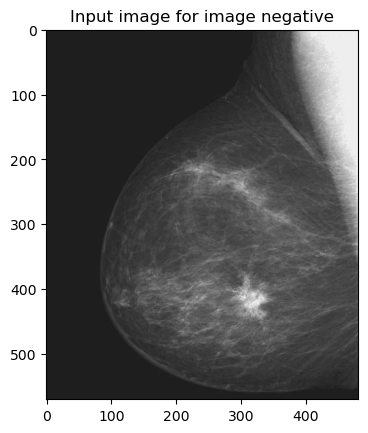

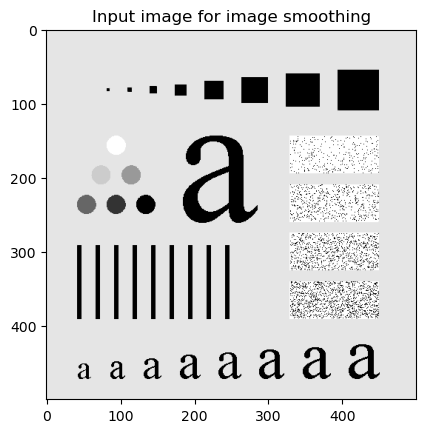

/var/folders/75/g9bbk_ns0y1dp1fmplvlfyn80000gn/T/ipykernel_25011/986792359.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
  average_intensity = (input_image[i-1, j-1] + input_image[i-1, j] + input_image[i-1, j+1] +


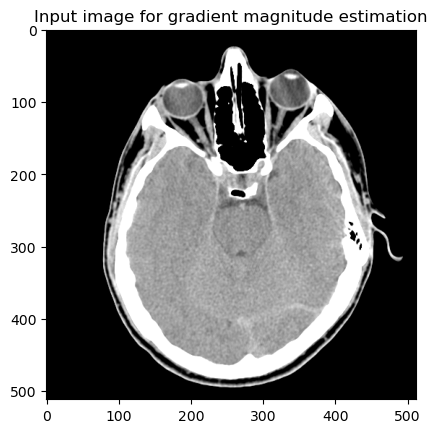

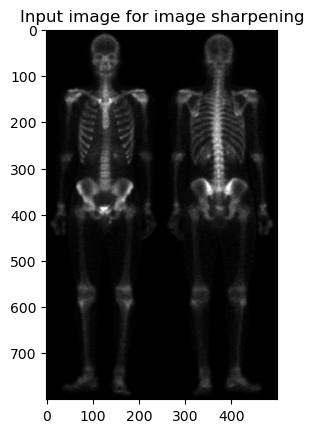

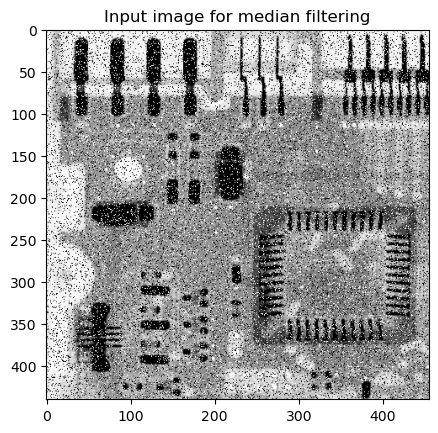

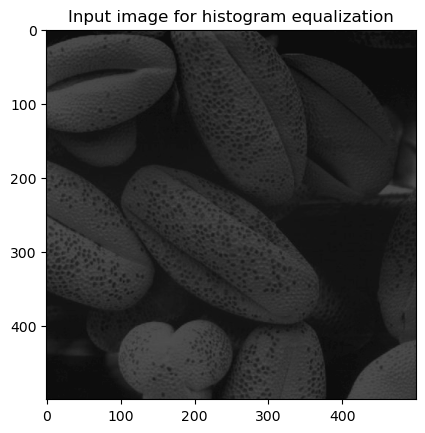

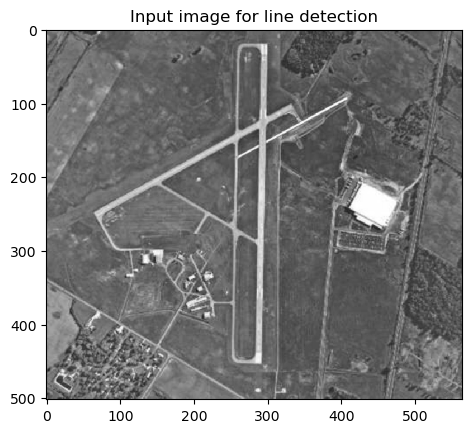

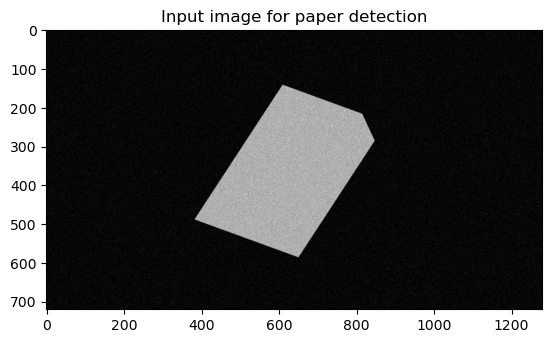

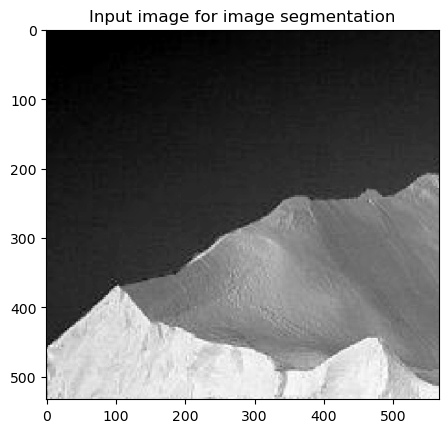

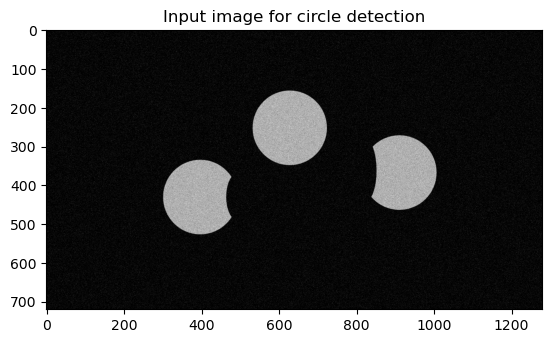

In [ ]:
# Run this code block to see your output images
main()